In [1]:
import pandas as pd
df = pd.read_csv('house_price_data.csv')
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [2]:
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [3]:
X = dataset[:,0:10]
Y = dataset[:,10]
X

array([[ 8450,     7,     5, ...,     8,     0,   548],
       [ 9600,     6,     8, ...,     6,     1,   460],
       [11250,     7,     5, ...,     6,     1,   608],
       ...,
       [ 9042,     7,     9, ...,     9,     2,   252],
       [ 9717,     5,     6, ...,     5,     0,   240],
       [ 9937,     5,     6, ...,     6,     0,   276]], dtype=int64)

In [4]:
Y

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [5]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [6]:
from sklearn.model_selection import train_test_split
#Data splitting
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [7]:
from tensorflow.keras.models import Sequential

In [10]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 

In [11]:
model = Sequential([
Dense(32, activation='relu', input_shape=(10,)),
Dense(32, activation='relu'),
Dense(1, activation='sigmoid'),])
model.compile(optimizer='sgd',
loss='binary_crossentropy',
metrics=['accuracy'])
hist = model.fit(X_train, Y_train,
batch_size=32,
epochs=100,
validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6798 - accuracy: 0.5039 - val_loss: 0.6852 - val_accuracy: 0.4384
Epoch 2/100
32/32 [==============================] - 0s 850us/step - loss: 0.6738 - accuracy: 0.5098 - val_loss: 0.6788 - val_accuracy: 0.4429
Epoch 3/100
32/32 [==============================] - 0s 717us/step - loss: 0.6683 - accuracy: 0.5157 - val_loss: 0.6727 - val_accuracy: 0.4521
Epoch 4/100
32/32 [==============================] - 0s 779us/step - loss: 0.6631 - accuracy: 0.5303 - val_loss: 0.6663 - val_accuracy: 0.5160
Epoch 5/100
32/32 [==============================] - 0s 805us/step - loss: 0.6577 - accuracy: 0.5988 - val_loss: 0.6597 - val_accuracy: 0.6347
Epoch 6/100
32/32 [==============================] - 0s 788us/step - loss: 0.6518 - accuracy: 0.6566 - val_loss: 0.6521 - val_accuracy: 0.7123
Epoch 7/100
32/32 [==============================] - 0s 809us/step - loss: 0.6451 - accuracy: 0.7162 - val_loss: 0.6441 - val_accuracy: 0.7626
E

Epoch 58/100
32/32 [==============================] - 0s 869us/step - loss: 0.3225 - accuracy: 0.8787 - val_loss: 0.2654 - val_accuracy: 0.9224
Epoch 59/100
32/32 [==============================] - ETA: 0s - loss: 0.1992 - accuracy: 1.00 - 0s 810us/step - loss: 0.3202 - accuracy: 0.8796 - val_loss: 0.2616 - val_accuracy: 0.9269
Epoch 60/100
32/32 [==============================] - 0s 801us/step - loss: 0.3182 - accuracy: 0.8796 - val_loss: 0.2603 - val_accuracy: 0.9224
Epoch 61/100
32/32 [==============================] - 0s 795us/step - loss: 0.3163 - accuracy: 0.8796 - val_loss: 0.2566 - val_accuracy: 0.9315
Epoch 62/100
32/32 [==============================] - 0s 701us/step - loss: 0.3141 - accuracy: 0.8816 - val_loss: 0.2533 - val_accuracy: 0.9269
Epoch 63/100
32/32 [==============================] - 0s 810us/step - loss: 0.3126 - accuracy: 0.8796 - val_loss: 0.2523 - val_accuracy: 0.9269
Epoch 64/100
32/32 [==============================] - 0s 780us/step - loss: 0.3110 - accuracy:

In [19]:
model.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 855us/step - loss: 0.3118 - accuracy: 0.8630


[0.31184032559394836, 0.8630136847496033]

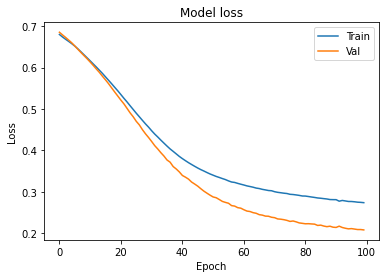

In [25]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

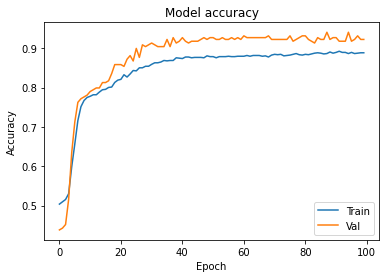

In [26]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [27]:
model = Sequential([
Dense(32, activation='relu', input_shape=(10,)),
Dense(32, activation='relu'),
Dense(1, activation='sigmoid'),])
model.compile(optimizer='sgd',
loss='binary_crossentropy',
metrics=['accuracy'])
predicted_price=model.predict(X_test)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
reg = LinearRegression().fit(X_test, Y_test)

In [31]:
reg.score(X_test, Y_test)

0.5330374566621174